## Kuramoto order parameter

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import os, sys
rootpath = os.path.join(os.getcwd(), '..')
sys.path.append(rootpath)

import pickle

import gzip

from os.path import isfile
import json



# load path_figures from config_user.json if it exists
path_config = "../config_user.json"
if isfile(path_config):
    with open(path_config, 'r') as f:
        config = json.load(f)
else:
    with open("../config_default.json", 'r') as f:
        config = json.load(f)

path_figures = config["path_figures"]
print(path_figures)




./figures/


In [2]:
savefig_args = {
    'transparent': True,
    'format': 'pdf',
    'dpi': 300,
    'facecolor': 'none',
    'bbox_inches': 'tight',
    'pad_inches': 0
}

#mm to inches conversion
def mm_to_inches(mm):
    return mm / 25.4

#colormap for raster plot
colors = [(0, 0, 0, 0),  
          (0, 0, 0.55, 1)]  
cmap = ListedColormap(colors)

In [10]:
filename='./data/FHN_2D_diffusion/heart_kuramoto_order_parameter.pkl.gz'
if os.path.isfile(filename):
    with gzip.open(filename, 'rb') as f:
        k_list= pickle.load(f)
else:
    raise ValueError('File not found')

C:\Users\pelli\AppData\Local\Temp\ipykernel_27500\1247020218.py:19: RuntimeWarning: Mean of empty slice
  avg_k = np.nanmean(k_list, axis=0)


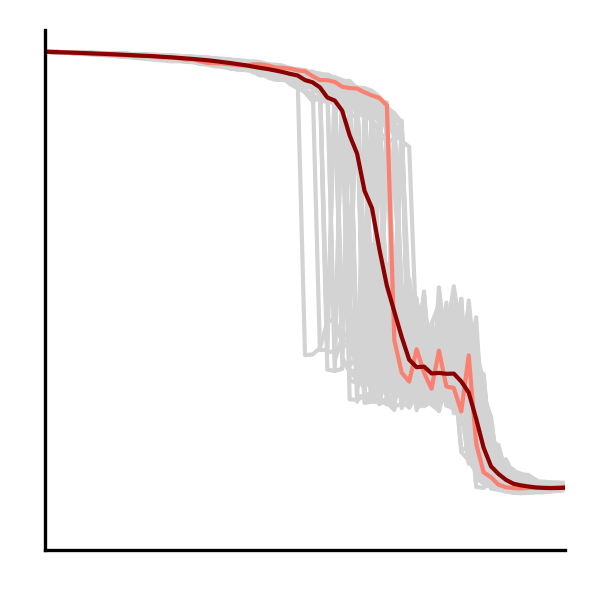

In [ ]:
width_mm = 45
height_mm = 45
# Plot the data
plt.figure(figsize=(mm_to_inches(width_mm), mm_to_inches(height_mm)), facecolor='none', dpi=300)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
##for i in range(100):
for i, trace in enumerate(k_list):
    if i == 0:
        plt.plot(np.arange(0, 0.71, 0.01), trace[:71], color='lightgrey', alpha=1, linewidth=1, label='Different realisations')
    else:
        plt.plot(np.arange(0, 0.71, 0.01), trace[:71], color='lightgrey', alpha=1, linewidth=1, rasterized=True)

plt.plot(np.arange(0, 0.71, 0.01), k_list[0][:71], color='salmon', alpha=1.0, label='Single realisation', linewidth=1, rasterized=True)


plt.xticks([])
plt.yticks([])

avg_k = np.nanmean(k_list, axis=0)

plt.plot(np.arange(0, 0.71, 0.01), avg_k[:71], color='darkred', linewidth=1, label='Average R', rasterized=True)
plt.ylim(0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(0,0.7)
##plt.fill_between(np.arange(0, 0.71, 0.01), min_k[:71], max_k[:71], color='lightgreen', alpha=0.5, label='Min/Max Range')

plt.savefig(path_figures+' heart_kuramoto.pdf', **savefig_args)

In [8]:
filename='./data/FHN_erdos_renyi_toybrain/brain_kuramoto_order_parameter.pkl.gz'
if os.path.isfile(filename):
    with gzip.open(filename, 'rb') as f:
        k_list= pickle.load(f)
else:
    raise ValueError('File not found')

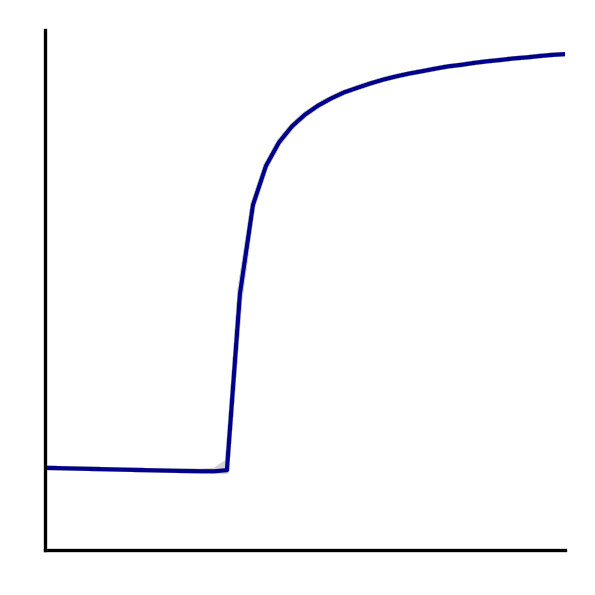

In [9]:
task_id=0
s_list=k_list[2:][:]
plt.figure(figsize=(mm_to_inches(width_mm), mm_to_inches(height_mm)), facecolor='none', dpi=300)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
for trace in s_list:
    
    plt.plot(np.arange(0, 0.25, 0.005), trace[:],color='lightgrey', alpha=1, linewidth=1, rasterized=True)
    task_id+=1

#plt.plot(np.arange(0, 0.25, 0.005), ent_list[2][:], color='c', alpha=1.0, label='Single seed', linewidth=2)

avg_k = np.nanmean(k_list, axis=0)
plt.yticks([])
plt.xticks([])
plt.ylim(0,1)
plt.xlim(0, 0.2)
plt.plot(np.arange(0, 0.25, 0.005), avg_k[:], color='darkblue', linewidth=1, label=r'Average R', rasterized=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig(path_figures+'brain_kuramoto.pdf', **savefig_args)